In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

train_file = "./adult-training.csv"
#test_file = "/home/tejakummarikuntla/Dev/EDA/Salary_Prediction/us-census-data/adult-test.csv"

columns = ['Age','Workclass','fnlgwt','Education','Education_num','Marital_Status',
           'Occupation','Relationship','Race','Sex','Capital_Gain','Capital_Loss',
           'Hours/Week','Native_country','Income']

In [5]:
train = pd.read_csv(train_file, names=columns)
train.head()

,Age,Workclass,fnlgwt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours/Week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## People from which Age group are having majority >50K?

     Income
Age        
30      171
29      134
28      119
27       81
26       63
25       53
24       31
22       13
23       12
21        3
19        2


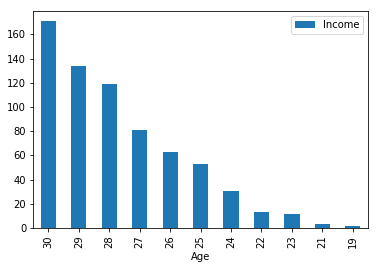

In [21]:
ag_30 = train[(train.Income == ' >50K') & (train.Age <= 30)].pivot_table(values='Income',
                                                                 index='Age', 
                                                                 aggfunc='count').sort_values(by='Income', ascending=False)
print(ag_30)
ag_30.plot(kind='bar')

     Income
Age        
46      292
37      292
45      288
47      288
38      282
44      281
41      279
39      278
43      273
42      270
40      268
36      263
50      261
34      243
51      242
35      217
48      217
49      206
52      192
33      191
32      189
53      189
31      183
54      173
30      171
55      146
59      133
57      131
58      122
56      118
60      101


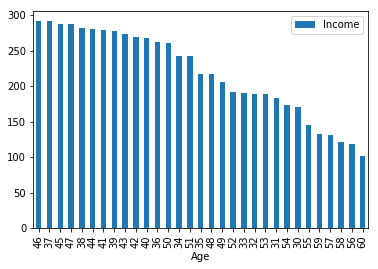

In [22]:
ag_30_60 = train[(train.Income == ' >50K') & (train.Age >= 30) & (train.Age <= 60)].pivot_table(values='Income',
                                                                                     index='Age',
                                                                                     aggfunc='count').sort_values(by='Income', ascending=False)
print(ag_30_60)
ag_30_60.plot(kind='bar')

     Income
Age        
60      101
61       96
62       67
63       59
64       53
65       43
67       37
66       35
68       27
69       21
70       19
71       16
74       12
73       10
79        9
72        9
90        8
75        7
76        5
77        5
78        5
81        3
80        2
83        2
84        1


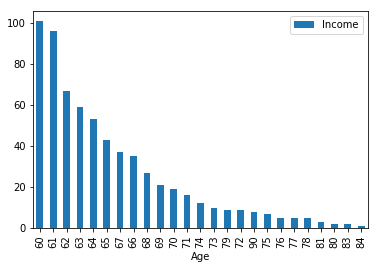

In [23]:
ag_60_90 = train[(train.Income == ' >50K') & (train.Age >= 60) & (train.Age <= 90)].pivot_table(values='Income', 
                                                                                     index='Age', 
                                                                                     aggfunc='count').sort_values(by='Income', ascending=False)
print(ag_60_90)
ag_60_90.plot(kind='bar')

### Report: Peple from age group `[30-60]` are more in #>50K Income

## People in which Education Field are having more #>50K Income?

               Income
Education            
 Bachelors       2221
 HS-grad         1675
 Some-college    1387
 Masters          959
 Prof-school      423
 Assoc-voc        361
 Doctorate        306
 Assoc-acdm       265
 10th              62
 11th              60
 7th-8th           40
 12th              33
 9th               27
 5th-6th           16
 1st-4th            6


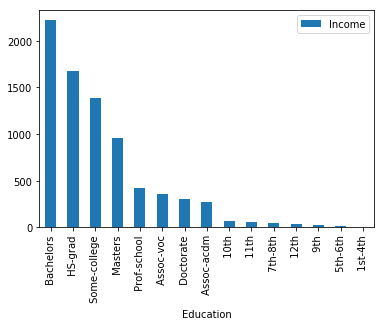

In [26]:
gt_50k_edu = train[(train.Income == ' >50K')].pivot_table(values='Income', index='Education',aggfunc='count').sort_values(by='Income', ascending=False)
print(gt_50k_edu)
gt_50k_edu.plot(kind='bar')

               Income
Education            
 Bachelors       2221
 HS-grad         1675
 Some-college    1387
 Masters          959
 Prof-school      423
 Assoc-voc        361
 Doctorate        306
 Assoc-acdm       265
 10th              62
 11th              60
 7th-8th           40
 12th              33
 9th               27
 5th-6th           16
 1st-4th            6


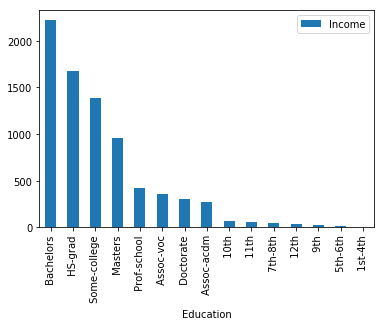

In [30]:
lt_50k_edu = train[(train.Income == ' >50K')].pivot_table(values='Income', index='Education',aggfunc='count').sort_values(by='Income', ascending=False)
print(lt_50k_edu)
lt_50k_edu.plot(kind='bar')

### Report: People from Bachlors are more in # >50K and <=50K Income

## Men in which working class earns more #>50K and <=50K

                   Income
Workclass                
 Private             4237
 Self-emp-not-inc     642
 Self-emp-inc         581
 Local-gov            463
 Federal-gov          315
 State-gov            285
 ?                    139


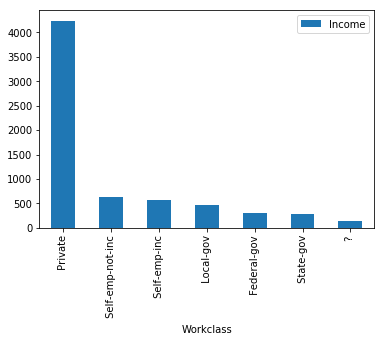

In [29]:
# Men with Income >50K [Workclass]
wrk_men = train[(train.Income == ' >50K') & (train.Sex == ' Male')].pivot_table(values='Income', index='Workclass',aggfunc='count').sort_values(by='Income', ascending=False)
print(wrk_men)
wrk_men.plot(kind='bar')

                   Income
Workclass                
 Private            10707
 Self-emp-not-inc    1500
 ?                    858
 Local-gov            795
 State-gov            524
 Self-emp-inc         400
 Federal-gov          330
 Without-pay            9
 Never-worked           5


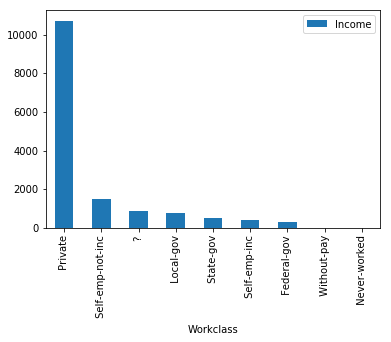

In [31]:
# Men with Income <=50K [Workclass]
wrk_men_lt = train[(train.Income == ' <=50K') & (train.Sex == ' Male')].pivot_table(values='Income', index='Workclass',aggfunc='count').sort_values(by='Income', ascending=False)
print(wrk_men_lt)
wrk_men_lt.plot(kind='bar')

### Report: Men in Private working class has more #>50K and <=50K

## Women in which working class earns more #>50K and <=50K